<a href="https://colab.research.google.com/github/aframuneer26/Deep_Learning_Experiments/blob/main/DL_exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu


100%|██████████| 170M/170M [00:02<00:00, 81.8MB/s]


Epoch 1: Loss = 1.6997, Accuracy = 40.00%
Epoch 2: Loss = 1.4810, Accuracy = 48.23%
Epoch 3: Loss = 1.3835, Accuracy = 51.75%
Epoch 4: Loss = 1.3113, Accuracy = 54.43%
Epoch 5: Loss = 1.2555, Accuracy = 56.54%
Epoch 6: Loss = 1.2052, Accuracy = 58.15%
Epoch 7: Loss = 1.1584, Accuracy = 59.88%
Epoch 8: Loss = 1.1168, Accuracy = 61.23%
Epoch 9: Loss = 1.0778, Accuracy = 62.72%
Epoch 10: Loss = 1.0394, Accuracy = 64.18%
Epoch 1: Loss = 1.6375, Accuracy = 42.79%
Epoch 2: Loss = 1.4365, Accuracy = 49.71%
Epoch 3: Loss = 1.3471, Accuracy = 53.12%
Epoch 4: Loss = 1.2738, Accuracy = 55.53%
Epoch 5: Loss = 1.2086, Accuracy = 57.91%
Epoch 6: Loss = 1.1590, Accuracy = 59.67%
Epoch 7: Loss = 1.1067, Accuracy = 61.82%
Epoch 8: Loss = 1.0656, Accuracy = 62.99%
Epoch 9: Loss = 1.0100, Accuracy = 65.02%
Epoch 10: Loss = 0.9774, Accuracy = 66.51%


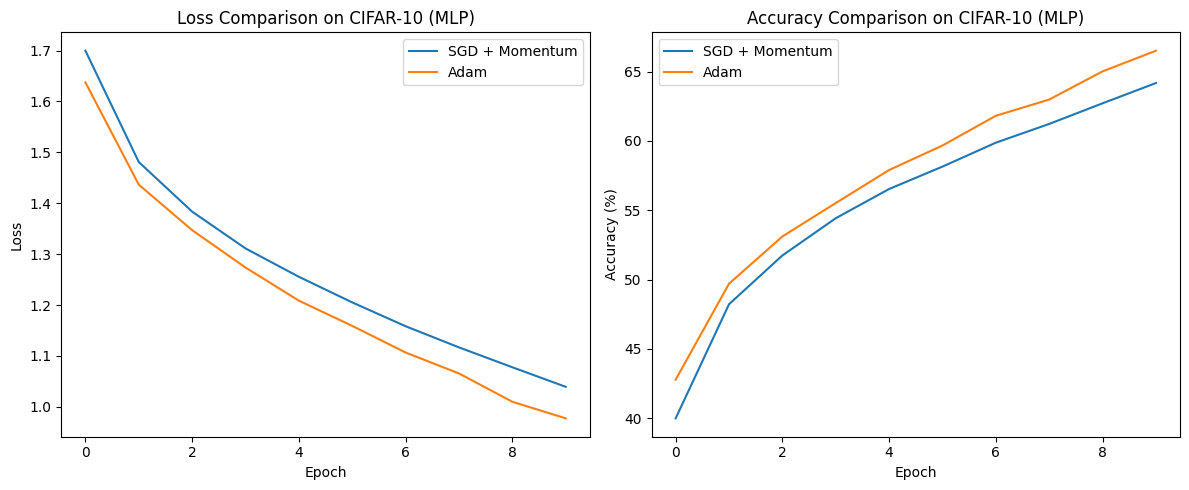

In [ ]:
# Step 1: Import Necessary Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 2: Set Device and Load Dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # For 3 channels (CIFAR10 is RGB)
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    transform=transform,
    download=True
)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Step 3: Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.net = nn.Sequential(
            nn.Linear(3*32*32, 256),  # input size = 3*32*32 (CIFAR10 images are 32x32x3)
            nn.ReLU(),
            nn.Linear(256, 10)        # output = 10 classes
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.net(x)

# Step 4: Define Training Function
def train(model, optimizer, epochs=10):
    model.to(device)
    loss_fn = nn.CrossEntropyLoss()
    losses = []
    accuracies = []

    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        model.train()

        for imgs, labels in trainloader:
            imgs, labels = imgs.to(device), labels.to(device)

            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(trainloader)
        accuracy = 100.0 * correct / total
        losses.append(avg_loss)
        accuracies.append(accuracy)

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Accuracy = {accuracy:.2f}%")

    return losses, accuracies

# Step 5: Train with SGD + Momentum and with Adam
model_sgd = MLP()
sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
losses_sgd, acc_sgd = train(model_sgd, sgd, epochs=10)

model_adam = MLP()
adam = optim.Adam(model_adam.parameters(), lr=0.001)
losses_adam, acc_adam = train(model_adam, adam, epochs=10)

# Step 6: Visualize Loss and Accuracy Comparison
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(losses_sgd, label="SGD + Momentum")
plt.plot(losses_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison on CIFAR-10 (MLP)")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(acc_sgd, label="SGD + Momentum")
plt.plot(acc_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison on CIFAR-10 (MLP)")
plt.legend()

plt.tight_layout()
plt.show()
